# Student Exam Performance EDA

**Disclaimer:** This dataset is fictional. It is merely being used for practice and to display my abilities as a data analyst.

The dataset consists of student exam performance records across multiple subjects.

---

### Objectives

* Display my skills in data analysis and visualization using Python
* Explore the data thoroughly to become more familiar with what it represents
* Discover indicators for student exam scores
* Display my skills in writing clear and concise write ups on the stories that data is telling

---

## Part 1: Data Cleaning and Preparation

Before any analysis can be done, the data must be inspected and "gotten familiar with." This will include . . .
* Checking for missing or null values in each column
* Checking the data types of each column
* Changing column names as needed
* Checking for and correcting inconsistencies in the data

In [1]:
# import packages

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style('darkgrid')

In [2]:
# read in csv

df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# examine the first 5 rows

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Explanation of Column Titles

No explanation for the columns was given, so these are my inferences . . .

* `gender`: Is the student male or female?
* `race/ethnicity`: The race/ethnicity of the student, expressed by breaking the different races into groups with a corresponding letter.
* `parental level of education`: The highest level of education achieved by the parent of each student.
* `lunch`: Which type of lunch does the student receive at school?
* `test preparation course`: Did the student complete a test prep course before taking the exam?
* `math score`: The student's exam score on the math exam.
* `reading score`: The student's exam score on the reading exam.
* `writing score`: The student's exam score on the writing exam.

Some of the column titles need "cleaning" to make them easier to work with.

In [4]:
# exploring the data types and seeing if any of the values are null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Null or Missing Values

The dataframe contains records on 1,000 students over 8 different variables. The `Non-Null Count` column displays that each of the 1,000 records has a non-null value, so nothing needs to be replaced or filled in.

---

### Data Types 

From the `Dtype` column, all of the data types are acceptable, but I do think it would be helpful to at least make the `parental level of education` column values be of type `category` with a specific order, as this variable would have a explicit order based on how high the parent reached in their educational career.

In [5]:
# cleaning up column names

df = df.rename(columns={'race/ethnicity': 'race',
                       'parental level of education' : 'parent_edu',
                       'test preparation course' : 'test_prep',
                       'math score' : 'math_score',
                       'reading score' : 'reading_score',
                       'writing score' : 'writing_score'})

df.head()

,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Checking Value Names for Inconsistencies

The qualitative variables should be checked for inconsistencies like capitialzation or spelling errors. Those would need to be cleaned before working with the data. Also, seeing the unique values in each column will help provide context for what each represents in context.

In [6]:
# what are the distinct entries in each column?
# particularly interested in the columns containing strings

print('UNIQUE VALUES BY COLUMN\n')
print(df.gender.unique())
print(df.race.unique())
print(df.parent_edu.unique())
print(df.lunch.unique())
print(df.test_prep.unique())

UNIQUE VALUES BY COLUMN

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


#### Parental Level of Education

* `some high school`: The parent attended and did not complete high school, thus they did not receive a high school degree.
* `high school`: The parent's highest education degree earned was a high school degree.
* `some college`: The parent attended and did not complete college, thus they did not receive a college degree.
* `associate's degree`: The parent's highest education degree was an associate's degree, which is usually a two year undergraduate program from a technical or community college in the United States.
* `bachelor's degree`: The parent's highest education degree was a bachelor's degree, which is usually a four year undergraduate program from a college or university in the United States.
* `master's degree`: The parent's highest education degree was a master's degree, which is usually a two year graduate program from a college or university in the United States.

---

#### Lunch

* `standard`: When purchasing lunch from the school, the student would pay full price and does not receive any discount.
* `free/reduced`: When purchasing lunch from the school, the student would pay a reduced price or a free lunch.

---

#### Test Preparation Course

* `none`: The student did **not** receive or take a test prep course before taking the exam.
* `completed`: The student did receive or take a test prep course before taking the exam.

---
#### Inconsistencies in Values

There are no inconsistencies in the entries for each column (no capitalization, spelling, or other errors). I personally would like to rename the entries in the `race` column to just be the letter corresponding with the group. I would also prefer if the `test_prep` column simply displayed 'yes' or 'no'.

In [7]:
# rename values in race column with just the letter

df = df.replace('group A', 'A')
df = df.replace('group B', 'B')
df = df.replace('group C', 'C')
df = df.replace('group D', 'D')
df = df.replace('group E', 'E')

# rename values in test_prep with yes or no

df = df.replace('none', 'no')
df = df.replace('completed', 'yes')

print(df.race.unique())
print(df.test_prep.unique())
df.head()

['B' 'C' 'A' 'D' 'E']
['no' 'yes']


,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,B,bachelor's degree,standard,no,72,72,74
1,female,C,some college,standard,yes,69,90,88
2,female,B,master's degree,standard,no,90,95,93
3,male,A,associate's degree,free/reduced,no,47,57,44
4,male,C,some college,standard,no,76,78,75


In [8]:
# changing the data type of parent_edu to an ordered category

order = ['some high school',
         'high school',
         'some college',
         "associate's degree",
         "bachelor's degree",
         "master's degree"]

df.parent_edu = df.parent_edu.astype('category')
df.parent_edu = df.parent_edu.cat.set_categories(order, ordered=True)

df.parent_edu.unique().sort_values()

['some high school', 'high school', 'some college', 'associate's degree', 'bachelor's degree', 'master's degree']
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate's degree' < 'bachelor's degree' < 'master's degree']

In [9]:
# checking the summary stats
# to see if any exam scores are strange

print(df.math_score.describe())
print('')
print(df.reading_score.describe())
print('')
print(df.writing_score.describe())

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64


None of the scores appear to be too extreme, or out of bounds. The max of 100 for all of the scores checks out. At least one student received a 0 on the math test, which may be correct, but could indicate a data entry error.

---

#### Adding Additional Columns

It would be helpful to have a column representing the total score (the sum of the three exam scores) for each student and if the parent has a college degree or not.

In [10]:
df['total_score'] = df.math_score + df.reading_score + df.writing_score
df.head()

,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score,total_score
0,female,B,bachelor's degree,standard,no,72,72,74,218
1,female,C,some college,standard,yes,69,90,88,247
2,female,B,master's degree,standard,no,90,95,93,278
3,male,A,associate's degree,free/reduced,no,47,57,44,148
4,male,C,some college,standard,no,76,78,75,229


In [11]:
df.total_score.dtype

dtype('int64')

In [12]:
degrees = {
    'some high school' : 'no college degree',
    'high school' : 'no college degree',
    'some college' : 'no college degree',
    'associate\'s degree' : 'college degree',
    'bachelor\'s degree' : 'college degree',
    'master\'s degree' : 'college degree',
}

df['parent_deg'] = df.parent_edu.map(degrees)
df.head()

,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score,total_score,parent_deg
0,female,B,bachelor's degree,standard,no,72,72,74,218,college degree
1,female,C,some college,standard,yes,69,90,88,247,no college degree
2,female,B,master's degree,standard,no,90,95,93,278,college degree
3,male,A,associate's degree,free/reduced,no,47,57,44,148,college degree
4,male,C,some college,standard,no,76,78,75,229,no college degree


In [13]:
df.parent_deg = df.parent_deg.astype('category')
df.parent_deg = df.parent_deg.cat.set_categories(['no college degree', 'college degree'], ordered=True)

df.parent_deg.unique().sort_values()

['no college degree', 'college degree']
Categories (2, object): ['no college degree' < 'college degree']

## Part 2: Data Exploration

Now that the data has been cleaned and inspected, some simple visualizations will be created to discover what stories the data has to tell. With each visualization, I will also be providing explanations to describe what I see the data is telling us.

---

### Categorical Variables

Because there are 1000 students, I will only be plotting a pie chart. This will display the distribution **AND** the count per category in one, as the percentage can simply be multiplied by 10 for the count.

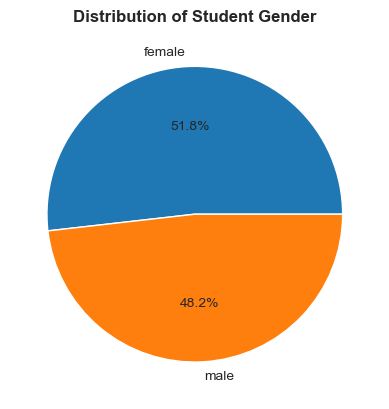

<Figure size 640x480 with 0 Axes>

In [14]:
# create a pie chart to display
# the proportion of students by gender

df.gender.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Student Gender', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

Visually, it's clear that the student data is nearly evenly split between male and female, with females having a slight majority.

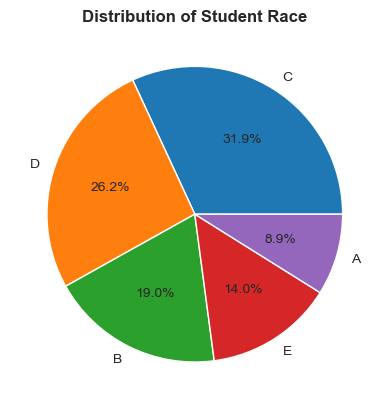

<Figure size 640x480 with 0 Axes>

In [15]:
# create a pie chart to display
# the proportion of students by race

df.race.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Student Race', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

The student races are not evenly distributed. A is considerably underrepresented among the other four.

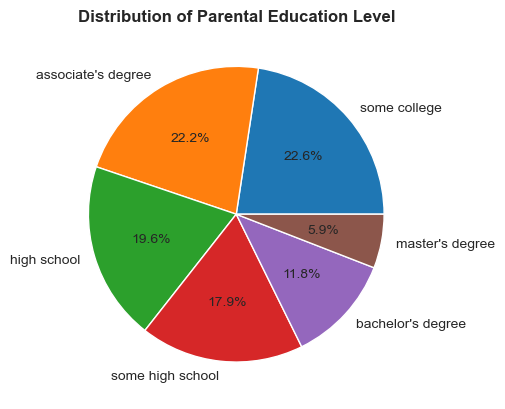

<Figure size 640x480 with 0 Axes>

In [16]:
# create a pie chart to display
# the proportion of students by
# parent's education level

df.parent_edu.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Parental Education Level', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

The different levels of education are fairly evenly distributed among the first four categories (`some high school`, `high school`, `some college`, and `associate's degree`). The counts/proportions dip fairly significantly for `bachelor's degree` and `master's degree`. If we look at it by `no college degree` vs. `college degree`, it should be a little more even.

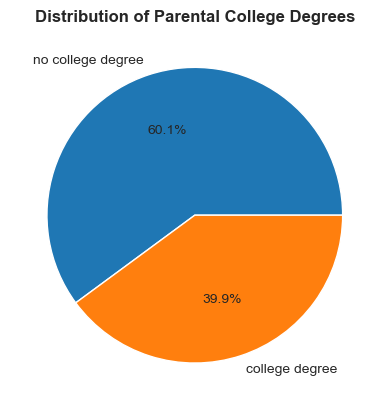

<Figure size 640x480 with 0 Axes>

In [17]:
# create a pie chart to display
# the proportion of students by
# parental college degree

df.parent_deg.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Parental College Degrees', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

While still not evenly distributed, the distribution of students with parents who have a college degree is roughly 60/40.

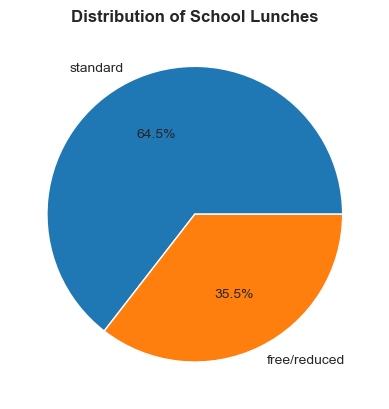

<Figure size 640x480 with 0 Axes>

In [18]:
# create a pie chart to display
# the proportion of students by
# their lunch plan

df.lunch.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of School Lunches', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

Nearly two-thirds of the students receive a standard lunch.

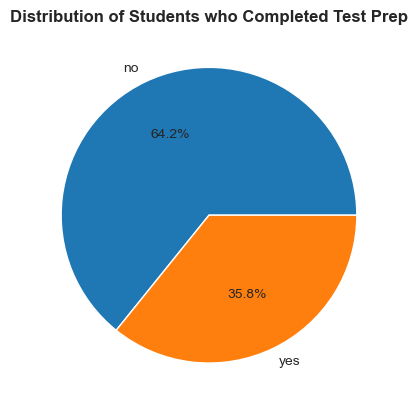

<Figure size 640x480 with 0 Axes>

In [19]:
df.test_prep.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Students who Completed Test Prep', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

The distribution of students who completed a test prep course before taking the exam is nearly identical to the distribution of student lunch plans. More exploration into the categories could reveal some association.

---

### Conclusion

The sample is fairly evenly distributed among `gender`, less so among the other categories.

---

### Quantitative Variables

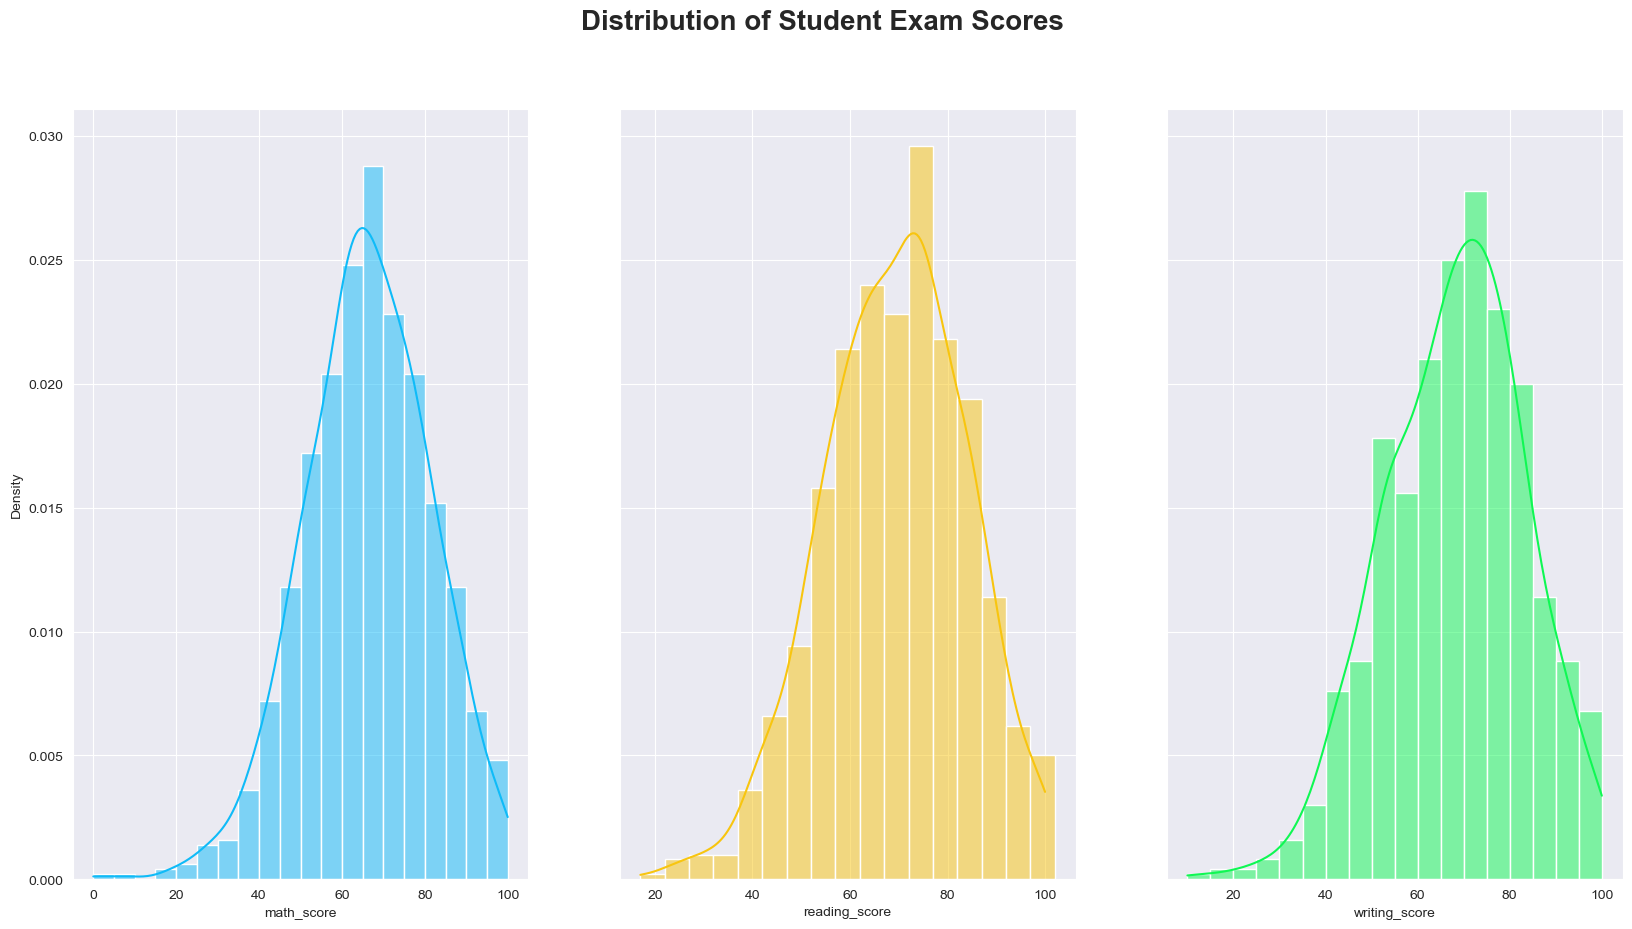

<Figure size 640x480 with 0 Axes>

In [20]:
# create three side by side histograms
# modeling distribution of student exam scores

fig, axes = plt.subplots(1, 3, figsize=(20,10), sharey=True)
fig.suptitle('Distribution of Student Exam Scores', size=20, fontweight='bold')

# math
sns.histplot(ax=axes[0], x='math_score', data=df, color='#0FBBF8', kde=True, binwidth=5, stat='density')

# reading
sns.histplot(ax=axes[1], x='reading_score', data=df, color='#F8C50F', kde=True, binwidth=5, stat='density')

# writing
sns.histplot(ax=axes[2], x='writing_score', data=df, color='#0FF853', kde=True, binwidth=5, stat='density')

plt.show()
plt.clf()

From the histograms, the distribution of scores appears to be roughly mound shaped. There appears to be some slight skew to the left, but still fairly symmetric.

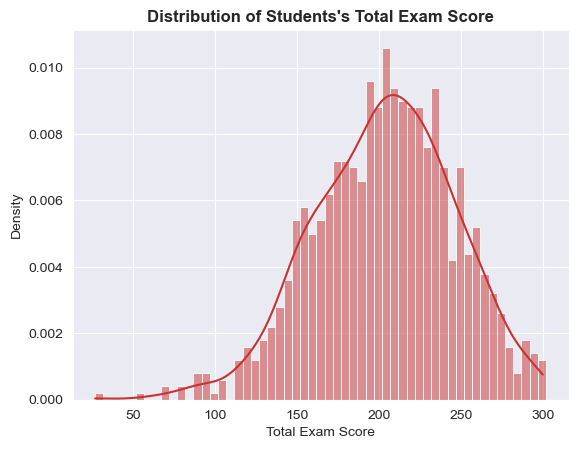

<Figure size 640x480 with 0 Axes>

In [21]:
# create a histogram to
# display the distribution of
# total exam scores

sns.histplot(x='total_score', data=df, color='#C93232', kde=True, binwidth=5, stat='density')
plt.title('Distribution of Students\'s Total Exam Score', fontweight='bold')
plt.xlabel('Total Exam Score')
plt.show()
plt.clf()

The total exam score is approximately mound shaped, but with some skew to the left.

In [22]:
df.skew(numeric_only=True)

math_score      -0.278935
reading_score   -0.259105
writing_score   -0.289444
total_score     -0.299057
dtype: float64

The negative skewness confirms the slightest skew to the left in all of the scores, but they are still fairly symmetrical. Some consideration should be made on examining the scores without potential outliers.

In [23]:
# define a function to remove outliers using the IQR

def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    return df[(df[col] >= lb) & (df[col] <= ub)]

df_clean = remove_outliers(df, 'math_score')
df_clean = remove_outliers(df, 'reading_score')
df_clean = remove_outliers(df, 'writing_score')
df_clean = remove_outliers(df, 'total_score')

In [24]:
df_clean.describe()

,math_score,reading_score,writing_score,total_score
count,994.000000,994.000000,994.000000,994.000000
mean,66.373239,69.439638,68.347082,204.159960
std,14.731519,14.216740,14.757020,41.456338
min,19.000000,28.000000,27.000000,88.000000
25%,57.000000,60.000000,58.000000,175.000000
50%,66.000000,70.000000,69.000000,206.000000
75%,77.000000,79.750000,79.000000,233.750000
max,100.000000,100.000000,100.000000,300.000000


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         994 non-null    object  
 1   race           994 non-null    object  
 2   parent_edu     994 non-null    category
 3   lunch          994 non-null    object  
 4   test_prep      994 non-null    object  
 5   math_score     994 non-null    int64   
 6   reading_score  994 non-null    int64   
 7   writing_score  994 non-null    int64   
 8   total_score    994 non-null    int64   
 9   parent_deg     994 non-null    category
dtypes: category(2), int64(4), object(4)
memory usage: 72.2+ KB


Only 6 records were removed when sorting out the outliers.

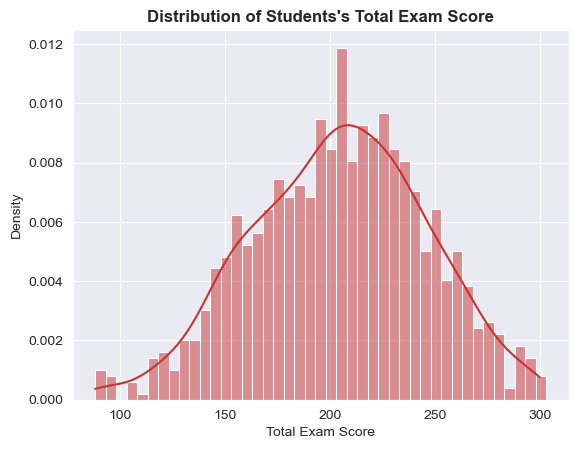

<Figure size 640x480 with 0 Axes>

In [26]:
# create a histogram to
# display the distribution of
# total exam scores from the
# cleaned data

sns.histplot(x='total_score', data=df_clean, color='#C93232', kde=True, binwidth=5, stat='density')
plt.title('Distribution of Students\'s Total Exam Score', fontweight='bold')
plt.xlabel('Total Exam Score')
plt.show()
plt.clf()

In [27]:
df_clean.skew(numeric_only=True)

math_score      -0.128832
reading_score   -0.144140
writing_score   -0.152696
total_score     -0.144487
dtype: float64

The distributions are even more symmetric after removing the 6 outlier exam scores.

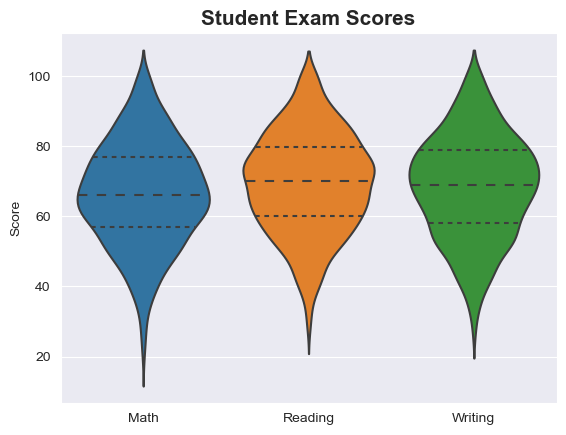

<Figure size 640x480 with 0 Axes>

In [28]:
# create side by side violin plots
# to model the distribution of 
# exam scores by subject

exam_scores = df_clean[['math_score', 'reading_score', 'writing_score']]
sns.violinplot(data=exam_scores, inner='quartile')
plt.title('Student Exam Scores', size=15, fontweight='bold')
plt.xticks([0, 1, 2], ['Math', 'Reading', 'Writing'])
plt.ylabel('Score')
plt.show()
plt.clf()

The violin plots show that the range of scores is approximately the same across the three subjects. Reading does tend to have higher scores than the other two, and math tends to be the lowest. Reading appears to be the most consistent, with smaller interquartile range and range in general.

---

### Bivariate Data

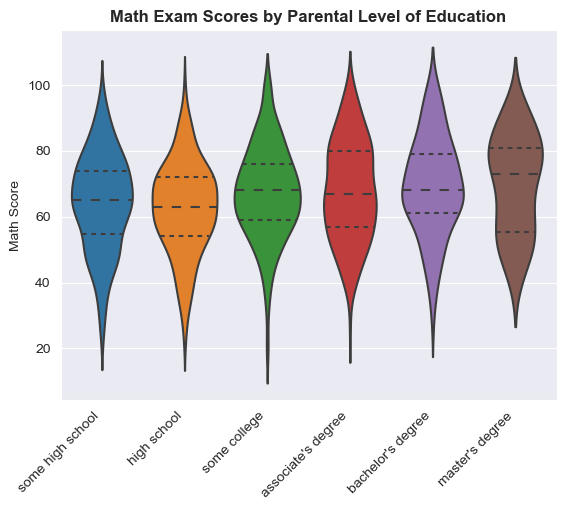

<Figure size 640x480 with 0 Axes>

In [29]:
# math scores by parent_edu

sns.violinplot(y='math_score', x='parent_edu', data=df_clean, inner='quartile')
plt.title('Math Exam Scores by Parental Level of Education', fontweight='heavy')
plt.ylabel('Math Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

The spread of the math exam scores by `parent_edu` is interesting. From `some high school` to `master's degree`, the median does not seem to change much. The lower quartile goes up and down. Interestingly, the lower quartile math score of students with a parent who has a master's degree is the lowest. Those students do have the highest upper quartile, but it's not dramatic. There is a lot of overlap in the violin plots, so the association is likely weak.

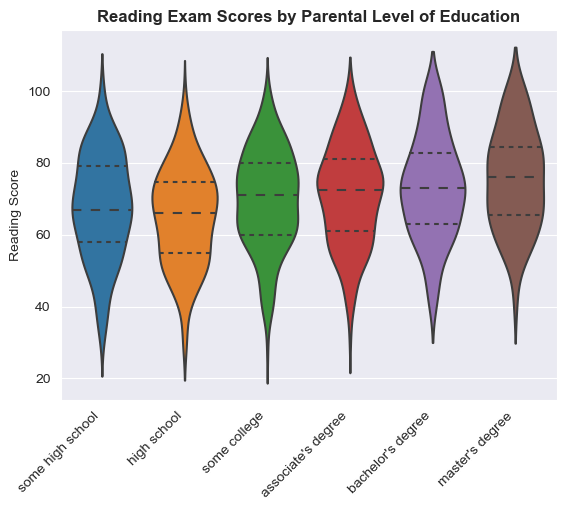

<Figure size 640x480 with 0 Axes>

In [30]:
# reading scores by parent_edu

sns.violinplot(y='reading_score', x='parent_edu', data=df_clean, inner='quartile')
plt.title('Reading Exam Scores by Parental Level of Education', fontweight='heavy')
plt.ylabel('Reading Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

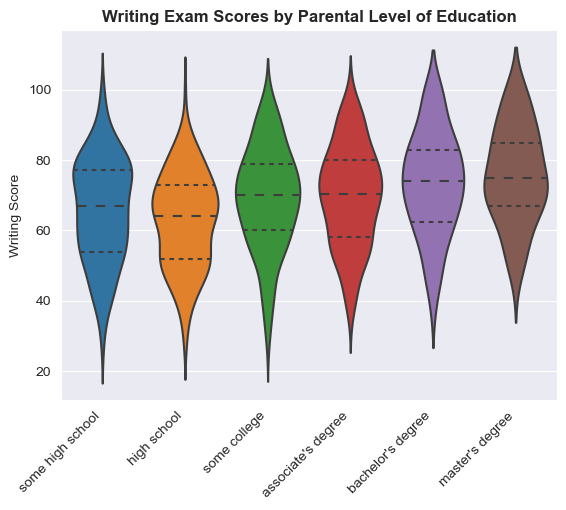

<Figure size 640x480 with 0 Axes>

In [31]:
# writing scores by parent_edu

sns.violinplot(y='writing_score', x='parent_edu', data=df_clean, inner='quartile')
plt.title('Writing Exam Scores by Parental Level of Education', fontweight='heavy')
plt.ylabel('Writing Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

With reading and writing, there does appear to be a general increase in exam score as the parent's education level increases (moreso than when examining the math scores).

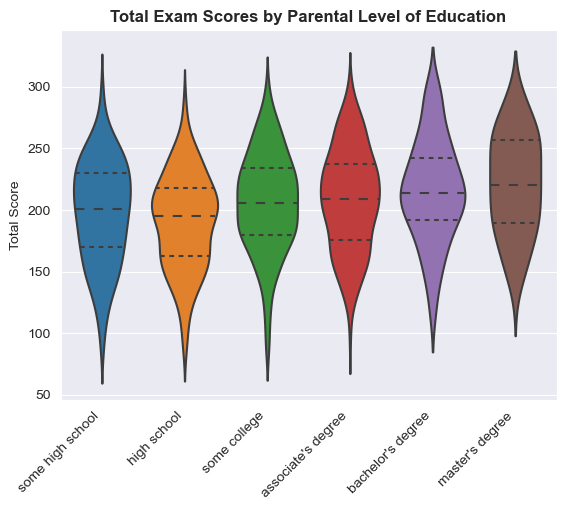

<Figure size 640x480 with 0 Axes>

In [32]:
# total scores by parent_edu

sns.violinplot(y='total_score', x='parent_edu', data=df_clean, inner='quartile')
plt.title('Total Exam Scores by Parental Level of Education', fontweight='heavy')
plt.ylabel('Total Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

There does seem to be a general trend upward in the median score by parent's level of education. The students whose parents have a master's degree potentially increase their "ceiling", but probably make marginal gains over students whose parent's have "lower" levels of education.

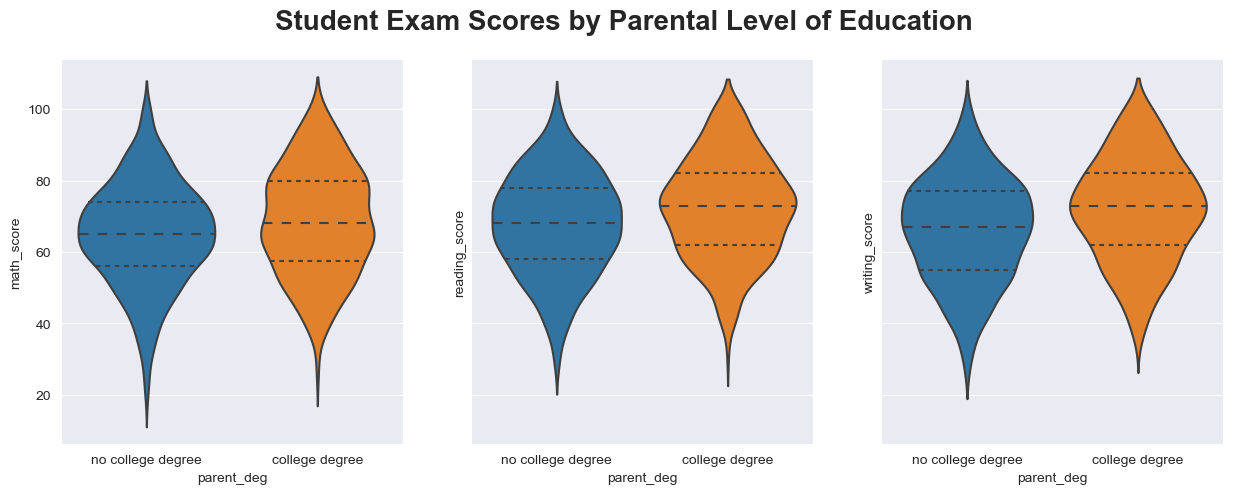

<Figure size 640x480 with 0 Axes>

In [33]:
# multiple violin plots

fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Student Exam Scores by Parental Level of Education', size=20, fontweight='bold')

# math
sns.violinplot(ax=axes[0], y='math_score', x='parent_deg', data=df_clean, inner='quartile')

# reading
sns.violinplot(ax=axes[1], y='reading_score', x='parent_deg', data=df_clean, inner='quartile')

# writing
sns.violinplot(ax=axes[2], y='writing_score', x='parent_deg', data=df_clean, inner='quartile')

plt.show()
plt.clf()

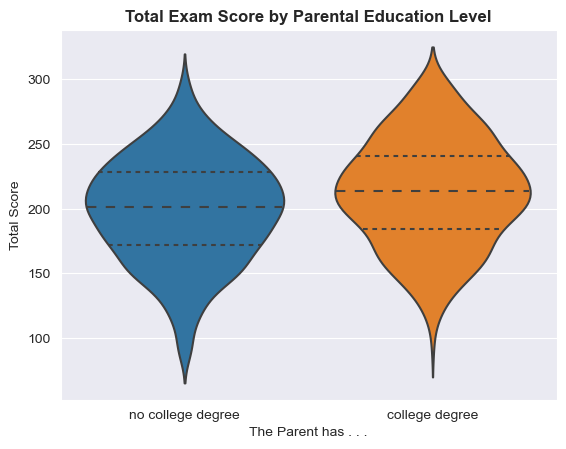

<Figure size 640x480 with 0 Axes>

In [34]:
# violin plot for total score by parent_deg

sns.violinplot(x='parent_deg', y='total_score', data=df_clean, inner='quartile')
plt.title('Total Exam Score by Parental Education Level', fontweight='bold')
plt.xlabel('The Parent has . . .')
plt.ylabel('Total Score')
plt.show()
plt.clf()

In [35]:
# finding the means and differences for the subjects and the total score by parent_deg

mean_math_test_deg = df_clean.math_score[df_clean.parent_deg == 'college degree'].mean()
mean_math_test_no_deg = df_clean.math_score[df_clean.parent_deg == 'no college degree'].mean()
mean_math_test_diff = mean_math_test_deg - mean_math_test_no_deg

mean_reading_test_deg = df_clean.reading_score[df_clean.parent_deg == 'college degree'].mean()
mean_reading_test_no_deg = df_clean.reading_score[df_clean.parent_deg == 'no college degree'].mean()
mean_reading_test_diff = mean_reading_test_deg - mean_reading_test_no_deg

mean_writing_test_deg = df_clean.writing_score[df_clean.parent_deg == 'college degree'].mean()
mean_writing_test_no_deg = df_clean.writing_score[df_clean.parent_deg == 'no college degree'].mean()
mean_writing_test_diff = mean_writing_test_deg - mean_writing_test_no_deg

mean_total_test_deg = df_clean.total_score[df_clean.parent_deg == 'college degree'].mean()
mean_total_test_no_deg = df_clean.total_score[df_clean.parent_deg == 'no college degree'].mean()
mean_total_test_diff = mean_total_test_deg - mean_total_test_no_deg

print('Mean Difference Math: {}'.format(round(mean_math_test_diff, 2)))
print('Mean Difference Reading: {}'.format(round(mean_reading_test_diff, 2)))
print('Mean Difference Writing: {}'.format(round(mean_writing_test_diff, 2)))
print('Mean Difference Total: {}'.format(round(mean_total_test_diff, 2)))

Mean Difference Math: 3.73
Mean Difference Reading: 4.61
Mean Difference Writing: 5.74
Mean Difference Total: 14.07


By separating into `college degree` and `no college degree` it's clearer that students with parents who have a college degree tend to perform better as a whole. The spread is roughly the same across all groups, except for the math exam where the interquartile range actually increased from `no college degree` to `college degree`. There is still overlap in the box plots, so the association might not be *that* strong.

--- 

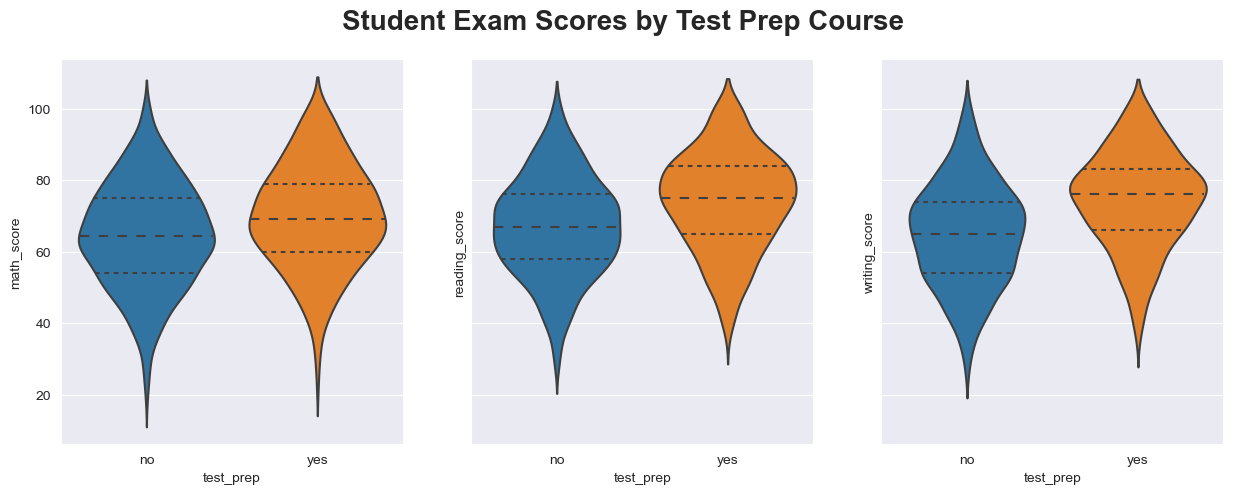

<Figure size 640x480 with 0 Axes>

In [36]:
# multiple violin plots

fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Student Exam Scores by Test Prep Course', size=20, fontweight='bold')

# math
sns.violinplot(ax=axes[0], y='math_score', x='test_prep', data=df_clean, inner='quartile')
plt.ylabel('')

# reading
sns.violinplot(ax=axes[1], y='reading_score', x='test_prep', data=df_clean, inner='quartile')

# writing
sns.violinplot(ax=axes[2], y='writing_score', x='test_prep', data=df_clean, inner='quartile')

plt.show()
plt.clf()

In [37]:
# finding the means and differences for the subjects and the total score by test_prep

mean_math_test_yes = df_clean.math_score[df_clean.test_prep == 'yes'].mean()
mean_math_test_no = df_clean.math_score[df_clean.test_prep == 'no'].mean()
mean_math_test_diff = mean_math_test_yes - mean_math_test_no

mean_reading_test_yes = df_clean.reading_score[df_clean.test_prep == 'yes'].mean()
mean_reading_test_no = df_clean.reading_score[df_clean.test_prep == 'no'].mean()
mean_reading_test_diff = mean_reading_test_yes - mean_reading_test_no

mean_writing_test_yes = df_clean.writing_score[df_clean.test_prep == 'yes'].mean()
mean_writing_test_no = df_clean.writing_score[df_clean.test_prep == 'no'].mean()
mean_writing_test_diff = mean_writing_test_yes - mean_writing_test_no

mean_total_test_yes = df_clean.total_score[df_clean.test_prep == 'yes'].mean()
mean_total_test_no = df_clean.total_score[df_clean.test_prep == 'no'].mean()
mean_total_test_diff = mean_total_test_yes - mean_total_test_no

print('Mean Difference Math: {}'.format(round(mean_math_test_diff, 2)))
print('Mean Difference Reading: {}'.format(round(mean_reading_test_diff, 2)))
print('Mean Difference Writing: {}'.format(round(mean_writing_test_diff, 2)))
print('Mean Difference Total: {}'.format(round(mean_total_test_diff, 2)))

Mean Difference Math: 5.19
Mean Difference Reading: 6.96
Mean Difference Writing: 9.49
Mean Difference Total: 21.64


Completing a test prep course before taking the exam does seem to improve student performance. It appears to have more of an impact than the parent's education level.

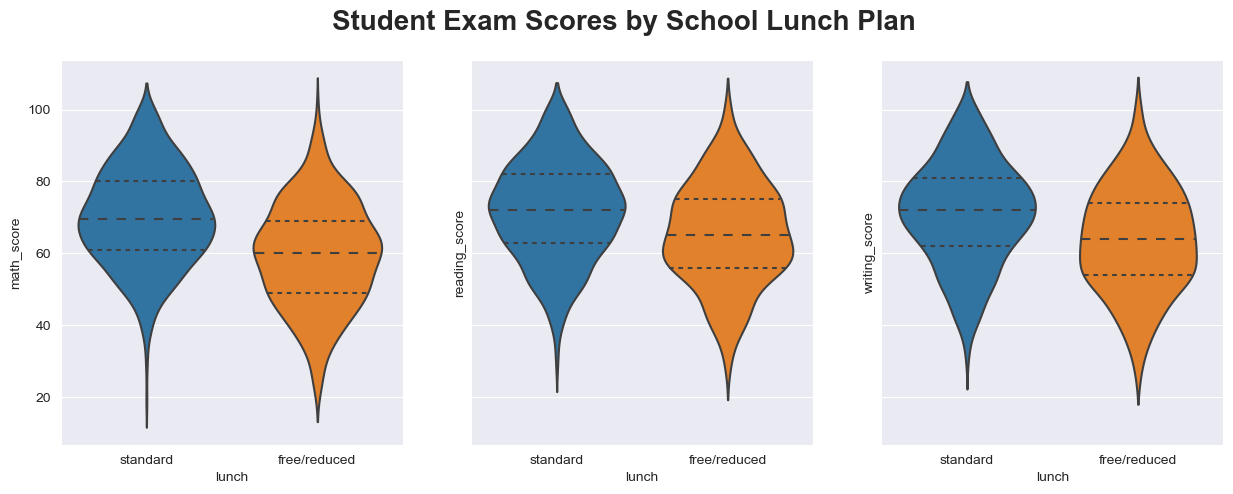

<Figure size 640x480 with 0 Axes>

In [38]:
# multiple violin plots

fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Student Exam Scores by School Lunch Plan', size=20, fontweight='bold')

# math
sns.violinplot(ax=axes[0], y='math_score', x='lunch', data=df_clean, inner='quartile')

# reading
sns.violinplot(ax=axes[1], y='reading_score', x='lunch', data=df_clean, inner='quartile')

# writing
sns.violinplot(ax=axes[2], y='writing_score', x='lunch', data=df_clean, inner='quartile')

plt.show()
plt.clf()

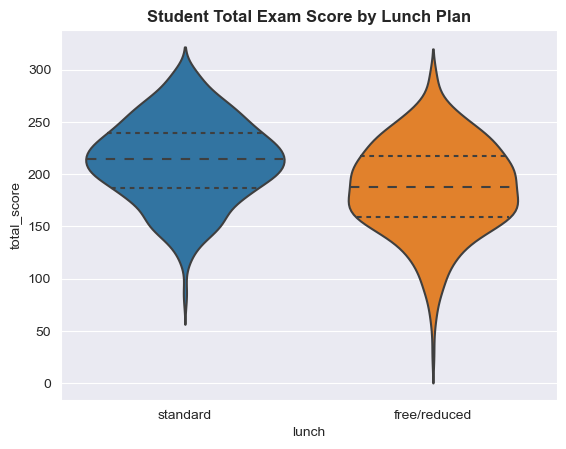

<Figure size 640x480 with 0 Axes>

In [39]:
# violin plot for total exam by lunch

sns.violinplot(x='lunch', y='total_score', data=df, inner='quartile')
plt.title('Student Total Exam Score by Lunch Plan', fontweight='heavy')
plt.show()
plt.clf()

In [40]:
# finding the means and differences for the subjects and the total score by lunch

mean_math_test_st = df_clean.math_score[df_clean.lunch == 'standard'].mean()
mean_math_test_fr = df_clean.math_score[df_clean.lunch == 'free/reduced'].mean()
mean_math_test_diff = mean_math_test_st - mean_math_test_fr

mean_reading_test_st = df_clean.reading_score[df_clean.lunch == 'standard'].mean()
mean_reading_test_fr = df_clean.reading_score[df_clean.lunch == 'free/reduced'].mean()
mean_reading_test_diff = mean_reading_test_st - mean_reading_test_fr

mean_writing_test_st = df_clean.writing_score[df_clean.lunch == 'standard'].mean()
mean_writing_test_fr = df_clean.writing_score[df_clean.lunch == 'free/reduced'].mean()
mean_writing_test_diff = mean_writing_test_st - mean_writing_test_fr

mean_total_test_st = df_clean.total_score[df_clean.lunch == 'standard'].mean()
mean_total_test_fr = df_clean.total_score[df_clean.lunch == 'free/reduced'].mean()
mean_total_test_diff = mean_total_test_st - mean_total_test_fr

print('Mean Difference Math: {}'.format(round(mean_math_test_diff, 2)))
print('Mean Difference Reading: {}'.format(round(mean_reading_test_diff, 2)))
print('Mean Difference Writing: {}'.format(round(mean_writing_test_diff, 2)))
print('Mean Difference Total: {}'.format(round(mean_total_test_diff, 2)))

Mean Difference Math: 10.57
Mean Difference Reading: 6.49
Mean Difference Writing: 7.25
Mean Difference Total: 24.31


There does appear to be some association between the type of lunch a student gets at school and their test scores.

---

### Conclusion

The three factors of `parent_deg`, `test_prep`, and `lunch` appear to impact the student's overall performance on this particular exam. Whether a parent has a college degree seems to have the least impact, while the student's lunch plan seems to have the most impact. This is based on analysis of the mean differences. Further testing should help provide sufficient evidence for the claim that these factors contribute to higher overall test scores.

---

## Part 3: Further Analysis (Quantitative)

I'll start with some simple hypothesis testing on if the test prep course had an affect on the average total score.

$$ H_{0}: \mu_{1} - \mu_{2} = 0 $$

$$ H_{A}: \mu_{1} - \mu_{2} < 0 $$

where $ \mu_{1} $ is the mean score from those who did **not** complete a test prep score and $ \mu_{2} $ is the mean score from those who did complete a test prep course. The significance level will be set as $\alpha = 0.05$.

First, each group will be made its own seperate dataframe.

In [41]:
# create new dataframe for the students who completed a test prep course

test_prep = df_clean[df_clean.test_prep == 'yes']
test_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 1 to 998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         358 non-null    object  
 1   race           358 non-null    object  
 2   parent_edu     358 non-null    category
 3   lunch          358 non-null    object  
 4   test_prep      358 non-null    object  
 5   math_score     358 non-null    int64   
 6   reading_score  358 non-null    int64   
 7   writing_score  358 non-null    int64   
 8   total_score    358 non-null    int64   
 9   parent_deg     358 non-null    category
dtypes: category(2), int64(4), object(4)
memory usage: 26.2+ KB


In [42]:
# create new dataframe for the students who did not complete a test prep course

no_test_prep = df_clean[df_clean.test_prep == 'no']
no_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         636 non-null    object  
 1   race           636 non-null    object  
 2   parent_edu     636 non-null    category
 3   lunch          636 non-null    object  
 4   test_prep      636 non-null    object  
 5   math_score     636 non-null    int64   
 6   reading_score  636 non-null    int64   
 7   writing_score  636 non-null    int64   
 8   total_score    636 non-null    int64   
 9   parent_deg     636 non-null    category
dtypes: category(2), int64(4), object(4)
memory usage: 46.3+ KB


In [43]:
# conduct a two-sample, left-tailed t-test on test prep's influence on the total score

test_tstat, test_pval = stats.ttest_ind(a=no_test_prep.total_score,
                              b=test_prep.total_score,
                              equal_var=True,
                             alternative='less')

print('p-value: {}'.format(test_pval))

p-value: 5.110578484001774e-16


$p < \alpha$, so there is signficant evidence to suggest that completing a test prep course improves a student's total exam score.

---

Next, a hypothesis test on if a parent having a college degree has a signficant impact on a student's exam score.

$$ H_{0}: \mu_{1} - \mu_{2} = 0 $$

$$ H_{A}: \mu_{1} - \mu_{2} < 0 $$

where $ \mu_{1} $ is the mean score from those whose parents **do not** have a college degree and $ \mu_{2} $ is the mean score from those whose parents do have a college degree. The significance level will be set as $\alpha = 0.05$.

In [44]:
# create a new dataframe for the students whose parents do not have a college degree

no_deg = df_clean[df_clean.parent_deg == 'no college degree']
no_deg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 1 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         595 non-null    object  
 1   race           595 non-null    object  
 2   parent_edu     595 non-null    category
 3   lunch          595 non-null    object  
 4   test_prep      595 non-null    object  
 5   math_score     595 non-null    int64   
 6   reading_score  595 non-null    int64   
 7   writing_score  595 non-null    int64   
 8   total_score    595 non-null    int64   
 9   parent_deg     595 non-null    category
dtypes: category(2), int64(4), object(4)
memory usage: 43.3+ KB


In [45]:
# create a new dataframe for the students whose parents do have a college degree

deg = df_clean[df_clean.parent_deg == 'college degree']
deg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 995
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         399 non-null    object  
 1   race           399 non-null    object  
 2   parent_edu     399 non-null    category
 3   lunch          399 non-null    object  
 4   test_prep      399 non-null    object  
 5   math_score     399 non-null    int64   
 6   reading_score  399 non-null    int64   
 7   writing_score  399 non-null    int64   
 8   total_score    399 non-null    int64   
 9   parent_deg     399 non-null    category
dtypes: category(2), int64(4), object(4)
memory usage: 29.2+ KB


In [46]:
# conduct a two-sample, left-tailed t-test on parent's degree status influence on the total score

deg_tstat, deg_pval = stats.ttest_ind(a=no_deg.total_score,
                              b=deg.total_score,
                              equal_var=True,
                             alternative='less')

print('p-value: {}'.format(deg_pval))

p-value: 6.488669706058782e-08


$p < \alpha$, so there is signficant evidence that students whose parents have college degrees perform better on average than students whose parents do not have a college degree, at least on this specific exam.

---

Finally, I'll test the hypothesis that a student's lunch plan impacts their total exam score.

$$ H_{0}: \mu_{1} - \mu_{2} = 0 $$

$$ H_{A}: \mu_{1} - \mu_{2} < 0 $$

where $ \mu_{1} $ is the mean score from students who receive a reduced/free lunch and $ \mu_{2} $ is the mean score from students who receive a standard lunch. The significance level will be set as $\alpha = 0.05$.

In [47]:
# create a new dataframe for the students who receieve a free/reduced lunch

reduced_free_lunch = df_clean[df_clean.lunch == 'free/reduced']
reduced_free_lunch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 3 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         350 non-null    object  
 1   race           350 non-null    object  
 2   parent_edu     350 non-null    category
 3   lunch          350 non-null    object  
 4   test_prep      350 non-null    object  
 5   math_score     350 non-null    int64   
 6   reading_score  350 non-null    int64   
 7   writing_score  350 non-null    int64   
 8   total_score    350 non-null    int64   
 9   parent_deg     350 non-null    category
dtypes: category(2), int64(4), object(4)
memory usage: 25.6+ KB


In [48]:
# create a new dataframe for the students who receieve a standard lunch

standard_lunch = df_clean[df_clean.lunch == 'standard']
standard_lunch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         644 non-null    object  
 1   race           644 non-null    object  
 2   parent_edu     644 non-null    category
 3   lunch          644 non-null    object  
 4   test_prep      644 non-null    object  
 5   math_score     644 non-null    int64   
 6   reading_score  644 non-null    int64   
 7   writing_score  644 non-null    int64   
 8   total_score    644 non-null    int64   
 9   parent_deg     644 non-null    category
dtypes: category(2), int64(4), object(4)
memory usage: 46.9+ KB


In [49]:
# conduct a two-sample, left-tailed t-test on the lunch plan's influence on the total score

lunch_tstat, lunch_pval = stats.ttest_ind(a=reduced_free_lunch.total_score,
                              b=standard_lunch.total_score,
                              equal_var=True,
                             alternative='less')

print('p-value: {}'.format(lunch_pval))

p-value: 1.0740604151420607e-19


$p < \alpha$, so there is signficant evidence that students who get the standard lunch perform better on average than students who receive a free/reduced lunch, at least on this specific exam.

---

### Conclusion

The average exam score between all of the groups analyzed are different. One of the factors (`test_prep`) is the one that the school or district has the most control over. The test prep course does have an impact on the student's performance and the school/district could make it mandatory for those taking the exam. A student having a parent with or without a college degree is out of their control. Further analysis might need to be made as to why this seems to be the case.

The `lunch` variable is the strange one to me. I went into the analysis assuming that this just represented the price of the school lunch, and that the quality is the same. It would seem that maybe there are more variables at play in this just under the surface, like socio-economic factors not represented in this sample. Again, further analysis would need to be done in order to find how much it impacts the student's total exam score.

(Again, this data set is fictional.)

---

## Part 4: Further Analysis (Qualitative)

I'm interested in examining the association between the categorical variables in the data set. Is there an association between any of these variables? For each, the null and alternate hypothesis and significance level will be as following . . .

$$ H_{0}:  \text{The variables are independent.} $$ 

$$ H_{A}:  \text{The variables are not independent.} $$

$$ \text{where } \alpha = 0.05 $$

Because the steps will be repeated for the various pairings, some functions will be built out for ease.

In [50]:
# import proper package

from scipy.stats import chi2_contingency

# define a function to build the contigency table
# and perform the chi-squared test of independence

def conduct_chisquared_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, pval, dof, exp = chi2_contingency(contingency_table)
    return pval

# define a function for drawing conclusions
# based on the chi-squared test

def draw_conclusion(p, alpha = 0.05):
    print('p-value: {}\n'.format(round(p, 3)))
    if p <= alpha:
        print('Reject H_0.')
    else:
        print('Fail to reject H_0.')

In [51]:
# conduct the test and draw conclusions for lunch and parent_deg

lunch_deg_pval = conduct_chisquared_test(df_clean, 'lunch', 'parent_deg')
draw_conclusion(lunch_deg_pval)

p-value: 0.587

Fail to reject H_0.


In [52]:
# conduct the test and draw conclusions for lunch and test_prep

lunch_test_pval = conduct_chisquared_test(df_clean, 'lunch', 'test_prep')
draw_conclusion(lunch_test_pval)

p-value: 0.539

Fail to reject H_0.


In [53]:
# conduct the test and draw conclusions for test_prep and parent_deg

test_deg_pval = conduct_chisquared_test(df_clean, 'test_prep', 'parent_deg')
draw_conclusion(test_deg_pval)

p-value: 0.609

Fail to reject H_0.


### Conclusion

None of the pairings of `lunch`, `test_prep`, or `parent_deg` have sufficient evidence to suggest they are related.

---

## Part 6: Linear Regression Analysis

Can a model be built to predict a student's total exam score based on the variables present in the data set? I will attempt to build one using the `sklearn` package.

In [54]:
# import the package

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [55]:
# separate the independent and dependent variable

X = df_clean[['gender', 'race', 'parent_edu', 'lunch', 'test_prep']]
y = df_clean['total_score']

In [56]:
# one-hot encode the categorical variables

encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

In [57]:
# create the linear regression model
# and fit the model to the data

model = LinearRegression()
model.fit(X_encoded, y)

LinearRegression()

In [58]:
# create dataframe of coefficients with column names

coef_df = pd.DataFrame({
    'feature': encoder.get_feature_names_out(X.columns),
    'coefficient': model.coef_
})

In [59]:
# print coefficients

print(coef_df)

                         feature  coefficient
0                    gender_male   -11.206075
1                         race_B     5.263147
2                         race_C     6.870269
3                         race_D    14.487844
4                         race_E    21.171947
5   parent_edu_bachelor's degree     7.620666
6         parent_edu_high school   -14.608039
7     parent_edu_master's degree    12.363552
8        parent_edu_some college    -2.323729
9    parent_edu_some high school   -11.447962
10                lunch_standard    24.925453
11                 test_prep_yes    21.734163


The coefficients represent the change in the predicted total score for a one-unit increase in the predictor variable. Of these variables, the ones that the school/district have the most control over is the test prep course. It has a positive impact on the student's exam score. The course could be made mandatory and the district could see some substantial gains to their students performance on the exam as a whole.

In [60]:
print('R-Squared: {}'.format(model.score(X_encoded, y)))

R-Squared: 0.2324448074883656


The $R^{2}$ value of approximately $0.2324$ indicates that the model explains $23.24\%$ of the variance in the total score. This means that there is still a lot of unexplained variance. This may be due to other variables not included in the model, or the complexity of the relationship between the predictors and the total score.